In [1]:
import ROOT as rt
from larcv import larcv
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.patches import Circle

Welcome to JupyROOT 6.14/02


In [2]:
# Specify location of dataset
#dataset = "/home/phy68/data/practice_test_5k.root"
dataset = "practice_test_5k.root"

In [3]:
# Get a look of the ROOT Trees inside the file
f = rt.TFile(dataset) # open file
f.ls() # print contents
f.Close() # close file (since we dont intend to interact with file directly)

TFile**		practice_test_5k.root	
 TFile*		practice_test_5k.root	
  KEY: TTree	image2d_data_tree;1	data tree
  KEY: TTree	particle_mctruth_tree;1	mctruth tree


In [4]:
# create instance of IOManager that will interface with file
io = larcv.IOManager(larcv.IOManager.kREAD,"input",larcv.IOManager.kTickForward)
io.add_in_file( dataset )
io.initialize()

True

    [NORMAL]  <input::prepare_input> Opening a file in READ mode: practice_test_5k.root
    [NORMAL]  <input::initialize> Prepared input with 5000 entries...


Warning in <TStreamerInfo::Build>: larcv::EventParticle: base class larcv::ParticleSet has no streamer or dictionary it will not be saved


In [5]:
# Define dictionary for interpretting class label
labelname = {0:"proton",
            1:"electron",
            2:"pion",
            3:"muon",
            4:"photon"}

In [10]:
NENTRIES = io.get_n_entries()
entry_list = np.random.randint(0,NENTRIES-1,size=10)
print(entry_list)

[  31 4847  110  490 1444 1943 2540 2289   26 1213]


ENTRY[31] PDG=11
('vtx: ', (82.94693699999999, 85.16704899999999, 5.346519, 443.191623))
('imgcoord: ', (165.89387399999998, 10.693038))
ENTRY[4847] PDG=2212
('vtx: ', (20.833624, 94.01505399999999, 42.668254999999995, 634.685039))
('imgcoord: ', (41.667248, 85.33650999999999))
ENTRY[110] PDG=11
('vtx: ', (33.718916, 50.023871, 3.8496479999999997, 176.219844))
('imgcoord: ', (67.437832, 7.6992959999999995))
ENTRY[490] PDG=11
('vtx: ', (41.838848, 65.778232, 117.666136, 1592.6342))
('imgcoord: ', (83.677696, 235.332272))
ENTRY[1444] PDG=22
('vtx: ', (9.948044999999999, 18.122507, 3.711044, 570.5880149999999))
('imgcoord: ', (19.896089999999997, 7.422088))


/home/twongjirad/.local/lib/python2.7/site-packages/ipykernel_launcher.py:18: DeprecationWarning: PyArray_FromDimsAndDataAndDescr: use PyArray_NewFromDescr.


ENTRY[1943] PDG=22
('vtx: ', (108.12368599999999, 68.781819, 47.312571999999996, 1413.276958))
('imgcoord: ', (216.24737199999998, 94.62514399999999))
ENTRY[2540] PDG=13
('vtx: ', (45.253254, 29.160838, 92.959015, 830.8348639999999))
('imgcoord: ', (90.506508, 185.91803))
ENTRY[2289] PDG=13
('vtx: ', (81.30781999999999, 127.73189699999999, 95.123654, 1111.513614))
('imgcoord: ', (162.61563999999998, 190.247308))
ENTRY[26] PDG=11
('vtx: ', (61.59647, 90.591703, 75.773909, 1347.185802))
('imgcoord: ', (123.19294, 151.547818))
ENTRY[1213] PDG=22
('vtx: ', (41.455984, 125.41197899999999, 46.364385, 136.1948))
('imgcoord: ', (82.911968, 92.72877))


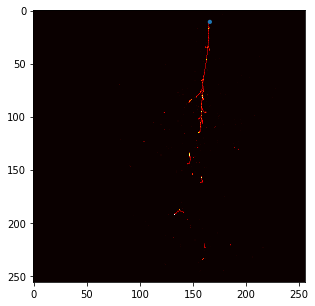

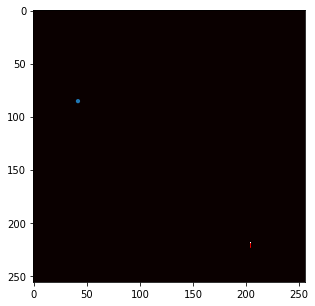

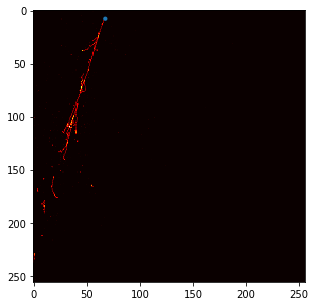

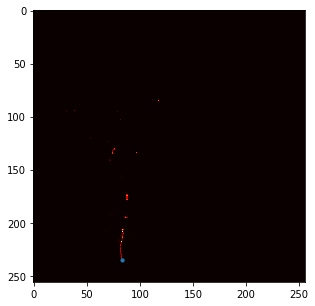

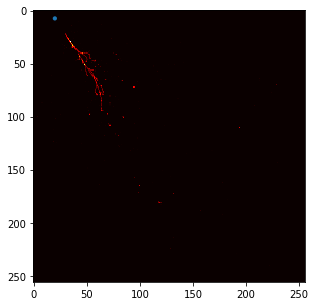

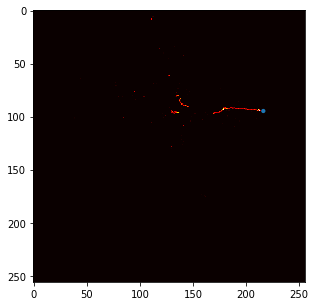

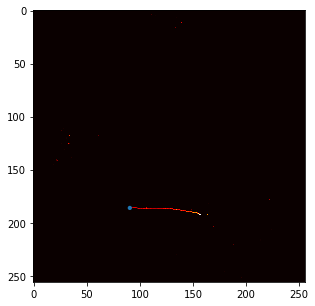

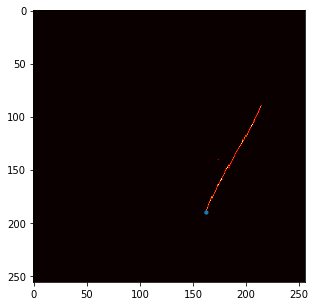

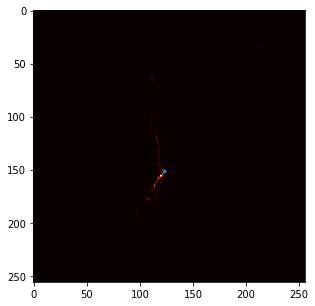

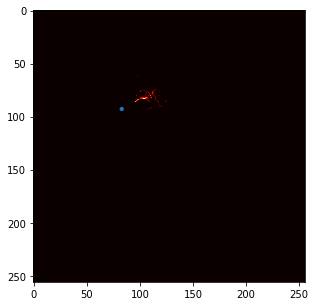

In [11]:
for n,entry in enumerate(entry_list.tolist()):
    
    io.read_entry(entry)
    ev_data = io.get_data(larcv.kProductImage2D,"data")
    ev_particle = io.get_data(larcv.kProductParticle, "mctruth")
    mcpart = ev_particle.as_vector().at(0)
    pdg = ev_particle.as_vector().at(0).pdg_code()
    
    print("ENTRY[%d] PDG=%d"%(entry,pdg))
    
    print("vtx: ",(mcpart.x(),mcpart.y(),mcpart.z(),mcpart.t()))
    pix = (mcpart.x()*2,mcpart.z()*2)
    print("imgcoord: ",pix)
    
    c = Circle((pix[0],pix[1]),2)
    
    img = ev_data.at(2)
    np_img = larcv.as_ndarray(img)
    
    fig, ax = plt.subplots(1,1,figsize=(5, 5))
    ax.add_patch(c)
    #img = imgbatch[ib,:].reshape(256,256)
    #imgout = padandcropandflip(img)
    #print("LABEL[%d]: "%(ib),labelname[np.argmax(lbl[ib])])
    ax.imshow(np_img, cmap='hot', interpolation='nearest')
    fig.show()